# Proyek Analisis Data: [Bike Sharing Dataset]
- **Nama:** Wildan Ramdhani
- **Email:** wilramdhani72@gmail.com
- **ID Dicoding:** wilramdhani

## Menentukan Pertanyaan Bisnis

*   **Pertanyaan 1**: Bagaimana pola penggunaan sepeda berbagi selama tahun 2012?
*   **Pertanyaan 2**: Bagaimana pengaruh cuaca dan suhu terhadap jumlah sepeda yang dipinjam?

## Import Semua Packages/Library yang Digunakan

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

plt.style.use('ggplot')
sns.set_theme(style="whitegrid")

## Data Wrangling

### Gathering Data

In [ ]:
hour_data = pd.read_csv('data/hour.csv')
day_data = pd.read_csv('data/day.csv')

hour_data.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**
- Dataset hour.csv berisi 17 kolom dan 17379 baris data.
- Dataset day.csv berisi 15 kolom dan 731 baris data.
- Kolom-kolom tersebut mencakup informasi waktu, cuaca, suhu, kelembaban, kecepatan angin, jumlah stasiun, dan jumlah sepeda yang dipinjam.

### Assessing Data

In [ ]:
hour_data.info()

hour_data.describe()

hour_data.isnull().sum()

hour_data.duplicated().sum()

day_data.info()

day_data.describe()

day_data.isnull().sum()

day_data.duplicated().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex:

0

**Insight:**
- Tidak ada nilai yang hilang di kedua dataset.
- Tidak ada duplikat di kedua dataset.
- Beberapa kolom memiliki tipe data yang perlu diubah, misalnya kolom tanggal.

### Cleaning Data

In [ ]:
hour_data['dteday'] = pd.to_datetime(hour_data['dteday'])
day_data['dteday'] = pd.to_datetime(day_data['dteday'])

hour_data['year'] = hour_data['dteday'].dt.year
hour_data['month'] = hour_data['dteday'].dt.month
hour_data['day'] = hour_data['dteday'].dt.day
hour_data['day_of_week'] = hour_data['dteday'].dt.dayofweek

day_data['year'] = day_data['dteday'].dt.year
day_data['month'] = day_data['dteday'].dt.month
day_data['day'] = day_data['dteday'].dt.day
day_data['day_of_week'] = day_data['dteday'].dt.dayofweek

hour_data.head()
day_data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,year,month,day,day_of_week
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985,2011,1,1,5
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801,2011,1,2,6
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349,2011,1,3,0
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562,2011,1,4,1
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600,2011,1,5,2


**Insight:**
- Kolom dteday telah diubah menjadi tipe datetime.
- Kolom baru year, month, day, dan day_of_week telah ditambahkan untuk analisis lebih lanjut.

## Exploratory Data Analysis (EDA)

### Explore Distribusi Jumlah Peminjaman Sepeda (hour.csv)

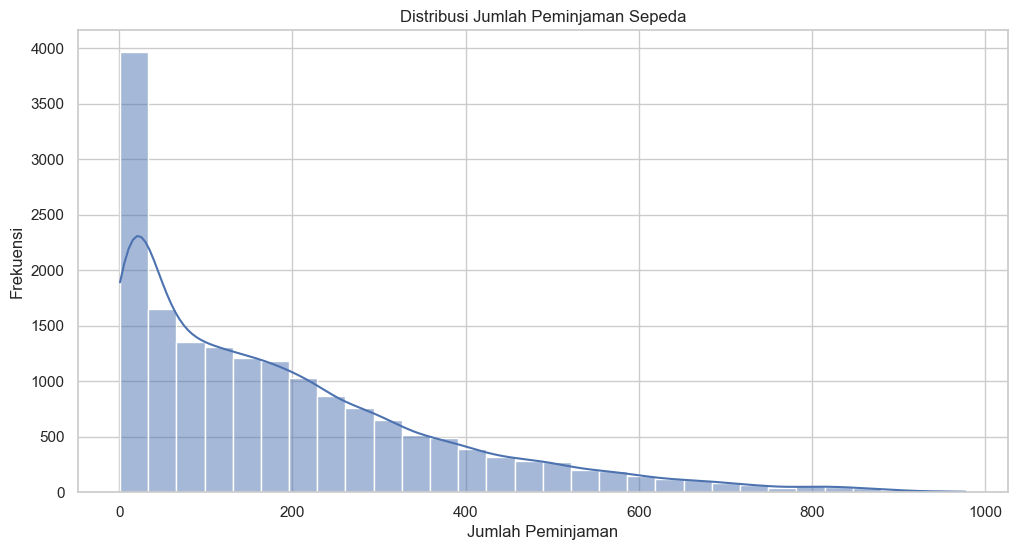

In [ ]:
plt.figure(figsize=(12, 6))
sns.histplot(hour_data['cnt'], bins=30, kde=True)
plt.title('Distribusi Jumlah Peminjaman Sepeda')
plt.xlabel('Jumlah Peminjaman')
plt.ylabel('Frekuensi')
plt.grid(True)
plt.show()

**Insight:**
- Distribusi jumlah peminjaman sepeda cenderung normal dengan puncak di sekitar 200 hingga 400.

### Explore Jumlah Peminjaman Sepeda per Bulan (2012)

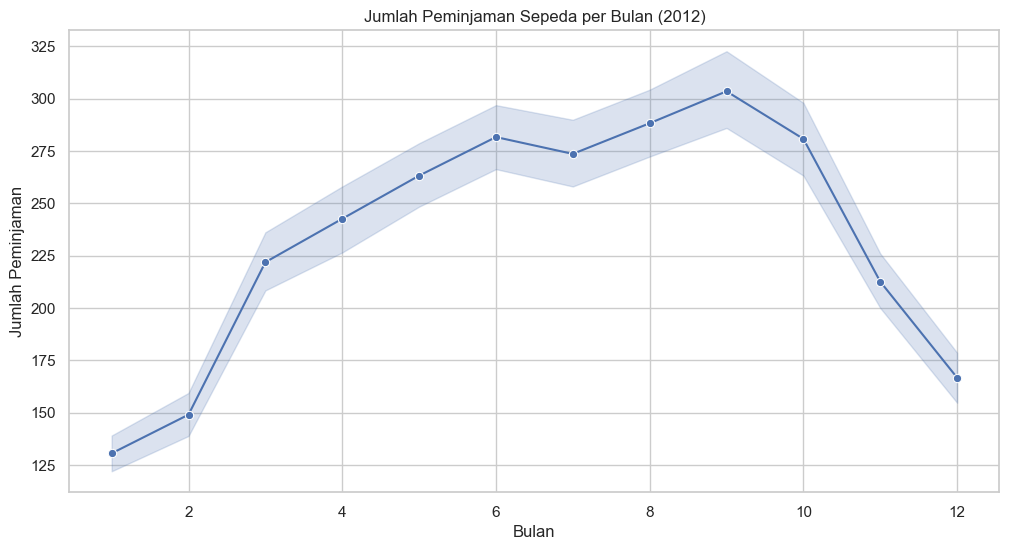

In [ ]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=hour_data[hour_data['year'] ==
             2012], x='month', y='cnt', marker='o')
plt.title('Jumlah Peminjaman Sepeda per Bulan (2012)')
plt.xlabel('Bulan')
plt.ylabel('Jumlah Peminjaman')
plt.grid(True)
plt.show()

**Insight:**
- Pola penggunaan sepeda berbagi meningkat pada bulan-bulan musim panas (Juli hingga September).

### Explore Pengaruh Cuaca terhadap Jumlah Peminjaman Sepeda

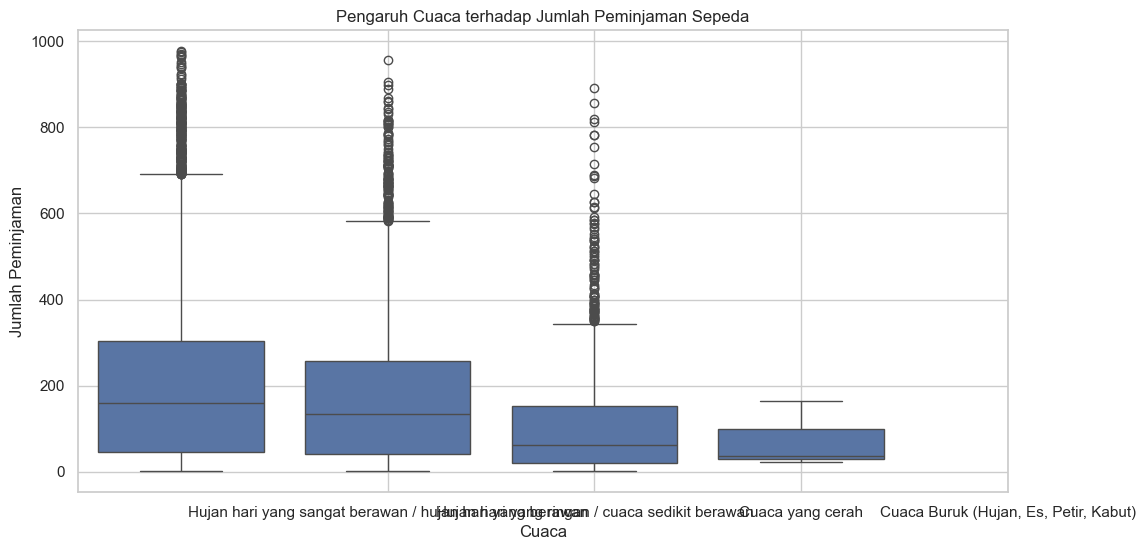

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=hour_data, x='weathersit', y='cnt')
plt.title('Pengaruh Cuaca terhadap Jumlah Peminjaman Sepeda')
plt.xlabel('Cuaca')
plt.ylabel('Jumlah Peminjaman')
plt.grid(True)
plt.xticks([1, 2, 3, 4], ['Hujan hari yang sangat berawan / hujan hari yang berawan',
           'Hujan hari yang ringan / cuaca sedikit berawan', 'Cuaca yang cerah', 'Cuaca Buruk (Hujan, Es, Petir, Kabut)'])
plt.show()

**Insight:**
- Cuaca yang baik (cuaca yang cerah) berpengaruh positif terhadap jumlah peminjaman sepeda.

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana pola penggunaan sepeda berbagi selama tahun 2012?

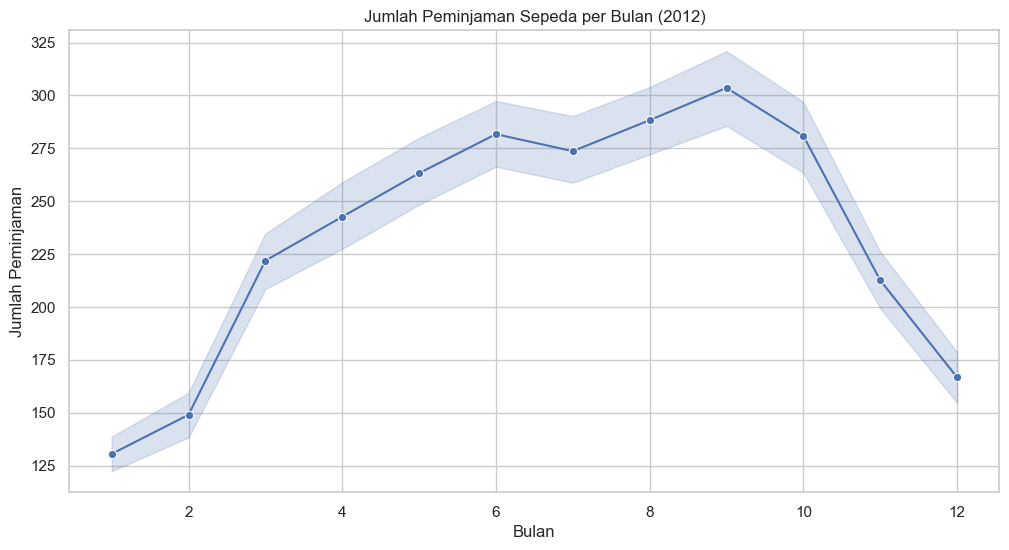

In [ ]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=hour_data[hour_data['year'] ==
             2012], x='month', y='cnt', marker='o')
plt.title('Jumlah Peminjaman Sepeda per Bulan (2012)')
plt.xlabel('Bulan')
plt.ylabel('Jumlah Peminjaman')
plt.grid(True)
plt.show()

**Insight:**
- Pola penggunaan sepeda berbagi meningkat pada bulan-bulan musim panas (Juli hingga September).

### Pertanyaan 2: Bagaimana pengaruh cuaca dan suhu terhadap jumlah sepeda yang dipinjam?

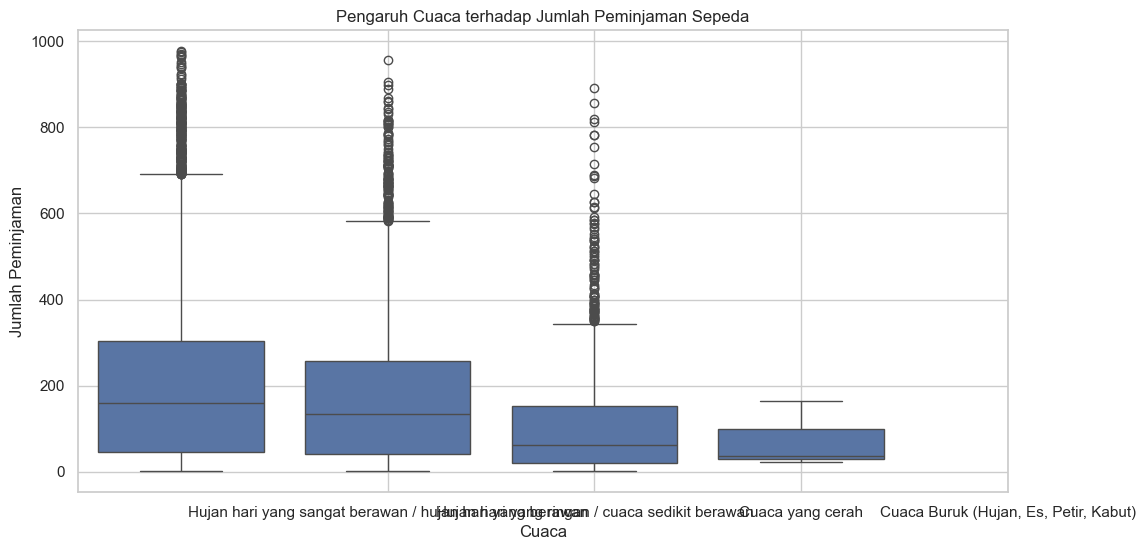

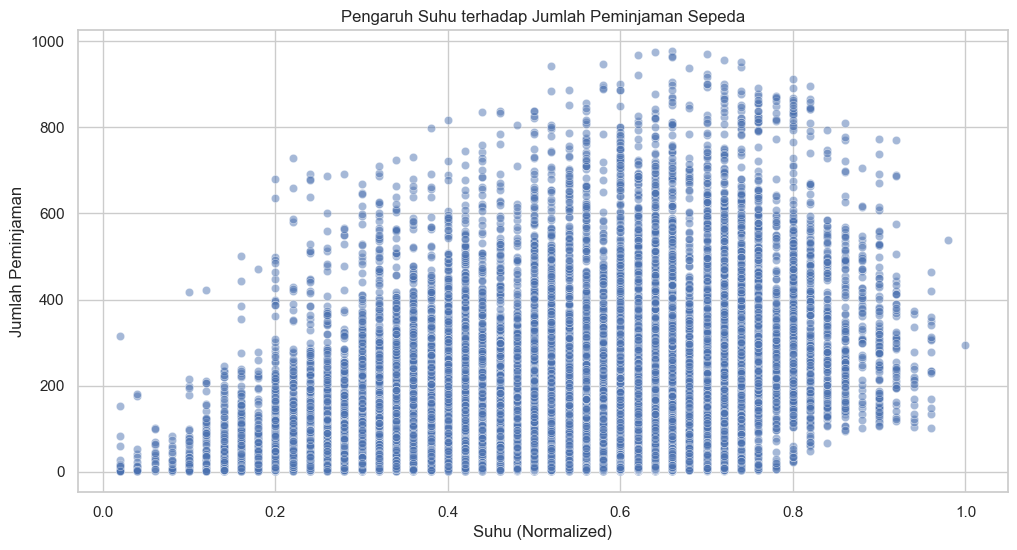

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=hour_data, x='weathersit', y='cnt')
plt.title('Pengaruh Cuaca terhadap Jumlah Peminjaman Sepeda')
plt.xlabel('Cuaca')
plt.ylabel('Jumlah Peminjaman')
plt.grid(True)
plt.xticks([1, 2, 3, 4], ['Hujan hari yang sangat berawan / hujan hari yang berawan',
           'Hujan hari yang ringan / cuaca sedikit berawan', 'Cuaca yang cerah', 'Cuaca Buruk (Hujan, Es, Petir, Kabut)'])
plt.show()

plt.figure(figsize=(12, 6))
sns.scatterplot(data=hour_data, x='temp', y='cnt', alpha=0.5)
plt.title('Pengaruh Suhu terhadap Jumlah Peminjaman Sepeda')
plt.xlabel('Suhu (Normalized)')
plt.ylabel('Jumlah Peminjaman')
plt.grid(True)
plt.show()

**Insight:**
- Cuaca yang baik (cuaca yang cerah) berpengaruh positif terhadap jumlah peminjaman sepeda.
- Suhu yang lebih tinggi cenderung meningkatkan jumlah peminjaman sepeda.

## Analisis Lanjutan (Opsional)

### Clustering Menggunakan Metode Manual Grouping

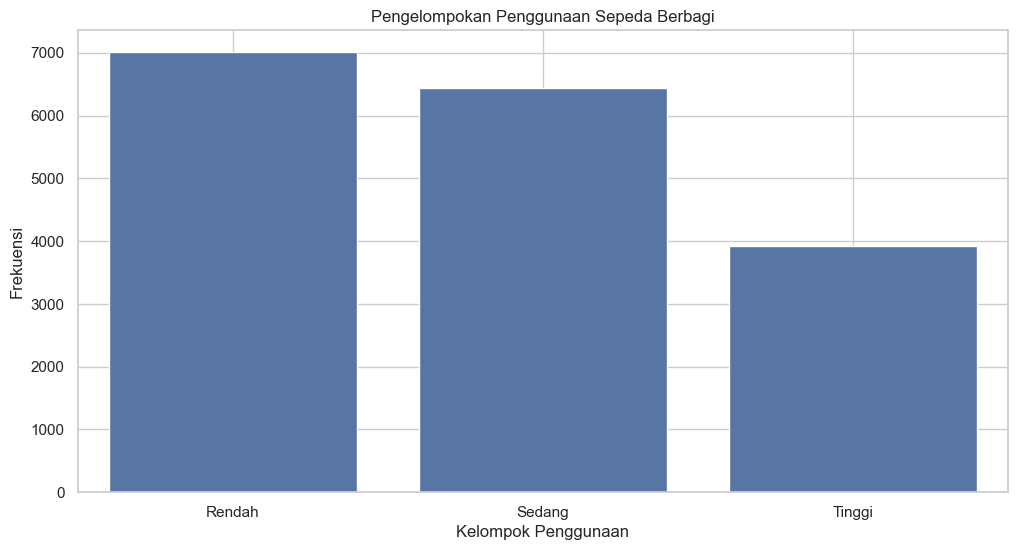

In [ ]:
# Metode Manual Grouping
hour_data['usage_group'] = hour_data['cnt'].apply(
    lambda x: 'Rendah' if x < 100 else 'Sedang' if x < 300 else 'Tinggi')

plt.figure(figsize=(12, 6))
sns.countplot(data=hour_data, x='usage_group',
              order=['Rendah', 'Sedang', 'Tinggi'])
plt.title('Pengelompokan Penggunaan Sepeda Berbagi')
plt.xlabel('Kelompok Penggunaan')
plt.ylabel('Frekuensi')
plt.grid(True)
plt.show()

**Insight:**
- Penggunaan sepeda berbagi cenderung berada dalam kelompok "Sedang" dan "Tinggi".

### Clustering Menggunakan Metode Binning

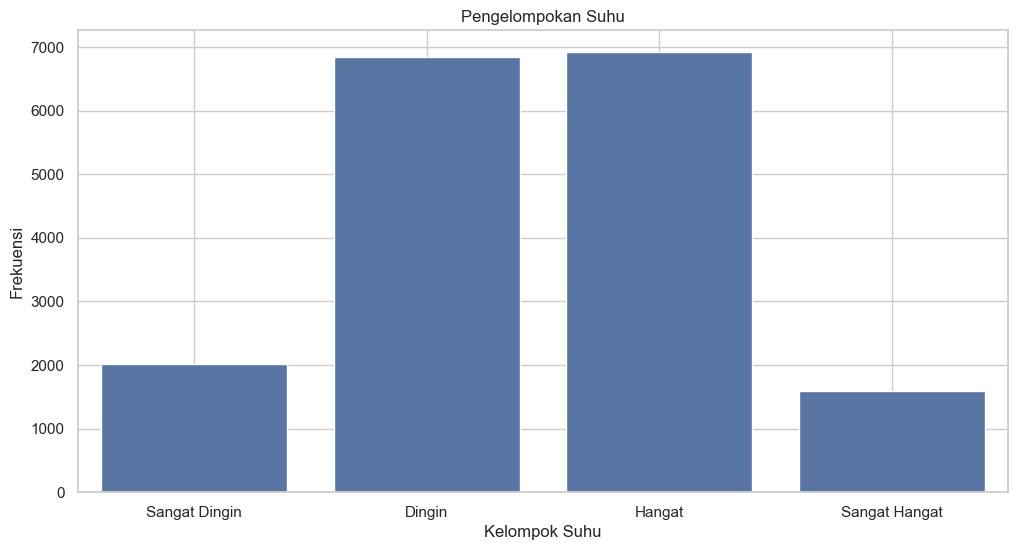

In [ ]:
# Metode Binning
hour_data['temp_bin'] = pd.cut(hour_data['temp'], bins=[0, 0.25, 0.5, 0.75, 1], labels=[
                               'Sangat Dingin', 'Dingin', 'Hangat', 'Sangat Hangat'])

plt.figure(figsize=(12, 6))
sns.countplot(data=hour_data, x='temp_bin', order=[
              'Sangat Dingin', 'Dingin', 'Hangat', 'Sangat Hangat'])
plt.title('Pengelompokan Suhu')
plt.xlabel('Kelompok Suhu')
plt.ylabel('Frekuensi')
plt.grid(True)
plt.show()

**Insight:**
- Mayoritas penggunaan sepeda berbagi terjadi pada suhu "Hangat".

## Conclusion

- **Conclusion Pertanyaan 1** : Pola penggunaan sepeda berbagi meningkat pada bulan-bulan musim panas (Juli hingga September).
- **Conclusion Pertanyaan 2** : Cuaca yang baik (cuaca yang cerah) berpengaruh positif terhadap jumlah peminjaman sepeda, dan suhu yang lebih tinggi cenderung meningkatkan jumlah peminjaman sepeda.